In [ ]:
### Combine all csv's in a directory, into a new file. 

import os
import glob
import pandas as pd
os.chdir('/Users/AlfHaugen/Python/Wildfire_Data/Missoula Emisions Data RDS-2017-0039/Emissions_Year')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

###combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
###export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')


In [1]:
import pandas as pd
emdata = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/Missoula Emisions Data RDS-2017-0039/Emissions_Year/emissions_year2003to2015.csv')

In [49]:
emdata.head(3)

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,...,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
0,0,2008,359,-81.0384,25.1958,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
1,1,2008,359,-81.0404,25.1984,4536,3,1600,62500.0,6220.097576,...,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,81,2,0
2,2,2008,359,-81.0380,25.1981,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0


In [3]:
emdata['year'].unique()

array([2008, 2009, 2013, 2007, 2006, 2012, 2004, 2010, 2011, 2005, 2015,
       2014, 2003])

In [58]:
### creating variable to limit the dataset to one year/ and moving the long and lat to the west coast (see below)
emyear2003 = emdata[(emdata.year == 2003) & (emdata.latitude > 34) & (emdata.longitude < -114)]
emyear2003[1:10]

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,...,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
6899728,69909,2003,231,-117.1740,34.0013,53519,2,2,0.0,198.952650,...,12.534017,0.479874,1.826385,0.0,0.0,2,1,15,1,0
6899729,69910,2003,231,-117.1713,34.0018,53519,2,2,0.0,192.900006,...,12.152700,0.465275,1.770822,0.0,0.0,2,1,15,1,0
6899746,69927,2003,231,-117.1746,34.0034,53519,2,2,0.0,137.417436,...,8.657298,0.331451,1.261492,0.0,0.0,2,1,15,1,0
6899747,69928,2003,231,-117.1719,34.0039,53519,82,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,2,1,15,1,0
6899811,69992,2003,295,-117.2408,34.0003,53518,2,2,62500.0,209.600820,...,13.204852,0.505557,1.924136,0.0,0.0,3,1,15,3,0
6899824,70005,2003,295,-117.2521,34.0005,53518,2,2,62500.0,233.026794,...,14.680688,0.562061,2.139186,0.0,0.0,3,1,15,3,0
6899825,70006,2003,295,-117.2494,34.0010,53518,2,2,62500.0,213.860088,...,13.473186,0.515831,1.963236,0.0,0.0,3,1,15,3,0
6899826,70007,2003,295,-117.2467,34.0015,53518,1,1,0.0,141.452532,...,9.208560,0.352556,1.341819,0.0,0.0,3,1,15,1,0
6899827,70008,2003,295,-117.2441,34.0020,53518,2,2,0.0,216.998496,...,13.670905,0.523400,1.992046,0.0,0.0,3,1,15,1,0


In [59]:
emyear2003.shape

(100308, 22)

In [60]:
emdata.shape

(7254534, 22)

In [61]:
emyear2003[['ECO2', 'ECO', 'ECH4', 'EPM2.5']].agg(['mean','min','max','count'])

,ECO2,ECO,ECH4,EPM2.5
mean,4194.321736,332.325324,18.234663,56.317688
min,0.000000,0.000000,0.000000,0.000000
max,14905.949251,1275.734395,71.748070,218.697325
count,100308.000000,100308.000000,100308.000000,100308.000000


In [62]:
### Mapping - initial map showed fires all over america, using smaller variables above to focus on west coast.  
### changes to matplotlib - color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12

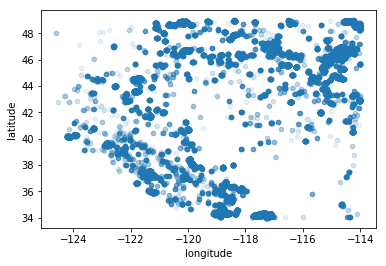

In [71]:
import matplotlib.pyplot as plt
emyear2003.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

In [ ]:
### Another plot to overlay intensity... 
emdata.plot(kind="scatter", x="longitude", y="latitude",
    s=emdata['population']/100, label="population",
    c="prefire_fuel", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

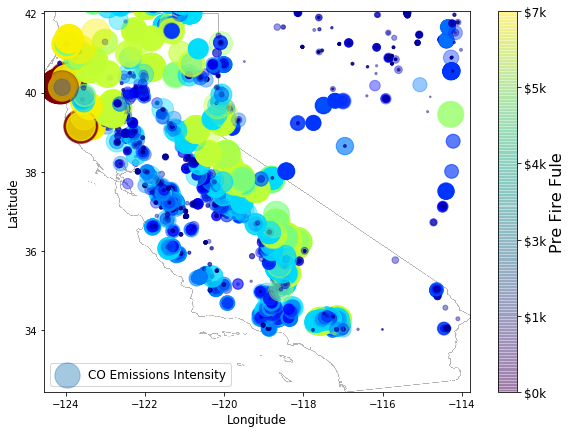

In [75]:
### plot over an actual map
import numpy as np
import matplotlib.image as mpimg
california_img=mpimg.imread('/Users/AlfHaugen/Python/Wildfire_Data/californiamap.png')
ax = emyear2003.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=emyear2003['ECO'], label="CO Emissions Intensity",
                       c="prefire_fuel", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.3)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Longitude", fontsize=12)

prices = emyear2003["prefire_fuel"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=12)
cbar.set_label('Pre Fire Fule', fontsize=16)

plt.legend(fontsize=12)
plt.show()